In [20]:
import json, re, csv
import pandas as pd
import langid, time
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def remove_foreignLang():
    with open('./data/output0315.json','r',encoding = 'utf-8') as file:
        output = json.load(file)
    jap = re.compile(r'[\u3040-\u309F\u30A0-\u30FF\uAC00-\uD7A3]')  # 前兩段是日文，後面是韓文 not adopted
    result = []
    for elm in output:
        if langid.classify(elm['title'])[0] != 'zh':
            result.append(elm)
    try:
        with open('./data/notChinese0315.csv', 'w', newline='',encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=result[0].keys())
            writer.writeheader()
            for elm in result:
                writer.writerow(elm)
    except IOError:
        print('Something went wrong with csv file!')

In [22]:
# 1495 rows removed to 1453 by manual
# remove_foreignLang()

In [23]:
remove_rows = pd.read_csv('./data/notChinese0315.csv')
result = pd.read_json('./data/output0315.json')
remove_rows = remove_rows.title
#total 6390 remove foreingLang 4940
result = result[~result['title'].isin(remove_rows)]
result

,title,introduction,link,price,booking_date,rating_star,rating_count,country,cities,cat_key
0,桃園青埔｜Xpark 都會型水生公園門票,由日本橫濱八景島首度跨海來台桃園開設分館「Xpark」，Xpark 主打新都會型水族館，驅使...,https://www.kkday.com/zh-tw/product/101517,550,2022-03-15 00:00:00,4.37,35113,台灣,[桃園],"[博物館&展覽, 景點門票, 城市觀光]"
1,2022紫戀薰衣草65折優惠起｜南投九族文化村門票(含水樂園)｜獨家加碼 KKday Poi...,立即上KKday訂購九族文化村門票，現場出示電子憑證即可換票入場，加碼贈送日月潭纜車來回車票...,https://www.kkday.com/zh-tw/product/18440,750,2022-03-15 00:00:00,4.80,4500,台灣,[南投],"[景點門票, 文化節慶, 主題樂園]"
2,【2022 台灣祭特別企劃】2~4日自由行｜高鐵來回票＆墾丁住宿＆專屬周邊＆現場接駁專案| ...,墾丁春吶回歸，2022年度最大盛事 - 台灣祭即將開跑，KKday獨家提供台灣祭專屬紀念商品...,https://www.kkday.com/zh-tw/product/126869,1050,2022-03-31 00:00:00,4.80,15,台灣,"[墾丁, 台北]","[特色表演, 特色行程, 多日遊]"
3,【獨家優惠83折】台南學甲｜頑皮世界野生動物園｜獨家長頸鹿手繪門票,立即預訂頑皮世界野生動物園門票，拜訪超萌水豚君、長頸鹿、企鵝、藪貓、科摩多龍...等來自全球...,https://www.kkday.com/zh-tw/product/100025,400,2022-03-15 00:00:00,4.70,1057,台灣,[台南],"[景點門票, 主題樂園, 自然生態]"
4,【買一送一】台灣嘉義｜阿里山國家森林遊樂區門票｜平假日均可使用（本國籍限定）,森林小火車、神木、雲海、日出與櫻花，阿里山國家森林遊樂區，是台灣最具知名、也最受歡迎的森林遊...,https://www.kkday.com/zh-tw/product/100459,200,2022-03-15 00:00:00,4.92,796,台灣,[嘉義],"[戶外休閒, 景點門票, 自然生態]"
...,...,...,...,...,...,...,...,...,...,...
4935,【DK Aromatherapy 手作體驗】DK Aromatherapy 天然清香驅蚊噴霧...,在蚊蟲常出沒的季節，最適合預先自製一瓶驅蚊噴霧！想知道如何製作既天然又清香，且讓蚊蟲遠離你的...,https://www.kkday.com/zh-tw/product/100984,1241,2022-03-16 00:00:00,0.00,0,港澳,[香港],[DIY課程]
4936,奧地利 6 天 5 夜 熊布朗宮、薩爾茲堡Salzburg、哈斯塔特 （2人成行）,名列世界文化遺產的維也納必去景點，熊布朗宮又稱美泉宮，曾是哈布斯堡王朝的夏宮，完整保存了奧地...,https://www.kkday.com/zh-tw/product/123682,33174,2022-03-31 00:00:00,0.00,0,奧地利,"[維也納, 薩爾斯堡邦]","[戶外休閒, 多日遊, 私人團&包車]"
4937,台灣台中手信｜裕珍馨 金賞纖果鳳梨酥禮盒、迷你奶油酥餅禮盒｜香港配送,立即透過 KKgift 訂購——台灣超人氣手信裕珍馨 金賞纖果鳳梨酥禮盒、迷你奶油酥餅禮盒，...,https://www.kkday.com/zh-tw/product/101261-yu-...,305,2022-03-24 00:00:00,4.64,11,港澳,[香港],[伴手禮]
4938,台灣台中手信｜宮原眼科 日出 土鳳梨酥禮盒｜香港、澳門配送,立即透過 KKgift 訂購——宮原眼科 日出 土鳳梨酥禮盒，相信大家都有聽過鼎鼎大名的台中...,https://www.kkday.com/zh-tw/product/121283-miy...,490,2022-03-22 00:00:00,5.00,4,港澳,[所有城市],"[當地美食, 伴手禮]"


In [24]:
result.isna().sum() # only booking_date has 767 missing value

title           0
introduction    0
link            0
price           0
booking_date    0
rating_star     0
rating_count    0
country         0
cities          0
cat_key         0
dtype: int64

In [25]:
result['booking_date'] = result['booking_date'].fillna(pd.Timestamp.now().strftime('%Y%m%d'))
result['booking_date'] = pd.to_datetime(result['booking_date']).astype(str)
result

,title,introduction,link,price,booking_date,rating_star,rating_count,country,cities,cat_key
0,桃園青埔｜Xpark 都會型水生公園門票,由日本橫濱八景島首度跨海來台桃園開設分館「Xpark」，Xpark 主打新都會型水族館，驅使...,https://www.kkday.com/zh-tw/product/101517,550,2022-03-15,4.37,35113,台灣,[桃園],"[博物館&展覽, 景點門票, 城市觀光]"
1,2022紫戀薰衣草65折優惠起｜南投九族文化村門票(含水樂園)｜獨家加碼 KKday Poi...,立即上KKday訂購九族文化村門票，現場出示電子憑證即可換票入場，加碼贈送日月潭纜車來回車票...,https://www.kkday.com/zh-tw/product/18440,750,2022-03-15,4.80,4500,台灣,[南投],"[景點門票, 文化節慶, 主題樂園]"
2,【2022 台灣祭特別企劃】2~4日自由行｜高鐵來回票＆墾丁住宿＆專屬周邊＆現場接駁專案| ...,墾丁春吶回歸，2022年度最大盛事 - 台灣祭即將開跑，KKday獨家提供台灣祭專屬紀念商品...,https://www.kkday.com/zh-tw/product/126869,1050,2022-03-31,4.80,15,台灣,"[墾丁, 台北]","[特色表演, 特色行程, 多日遊]"
3,【獨家優惠83折】台南學甲｜頑皮世界野生動物園｜獨家長頸鹿手繪門票,立即預訂頑皮世界野生動物園門票，拜訪超萌水豚君、長頸鹿、企鵝、藪貓、科摩多龍...等來自全球...,https://www.kkday.com/zh-tw/product/100025,400,2022-03-15,4.70,1057,台灣,[台南],"[景點門票, 主題樂園, 自然生態]"
4,【買一送一】台灣嘉義｜阿里山國家森林遊樂區門票｜平假日均可使用（本國籍限定）,森林小火車、神木、雲海、日出與櫻花，阿里山國家森林遊樂區，是台灣最具知名、也最受歡迎的森林遊...,https://www.kkday.com/zh-tw/product/100459,200,2022-03-15,4.92,796,台灣,[嘉義],"[戶外休閒, 景點門票, 自然生態]"
...,...,...,...,...,...,...,...,...,...,...
4935,【DK Aromatherapy 手作體驗】DK Aromatherapy 天然清香驅蚊噴霧...,在蚊蟲常出沒的季節，最適合預先自製一瓶驅蚊噴霧！想知道如何製作既天然又清香，且讓蚊蟲遠離你的...,https://www.kkday.com/zh-tw/product/100984,1241,2022-03-16,0.00,0,港澳,[香港],[DIY課程]
4936,奧地利 6 天 5 夜 熊布朗宮、薩爾茲堡Salzburg、哈斯塔特 （2人成行）,名列世界文化遺產的維也納必去景點，熊布朗宮又稱美泉宮，曾是哈布斯堡王朝的夏宮，完整保存了奧地...,https://www.kkday.com/zh-tw/product/123682,33174,2022-03-31,0.00,0,奧地利,"[維也納, 薩爾斯堡邦]","[戶外休閒, 多日遊, 私人團&包車]"
4937,台灣台中手信｜裕珍馨 金賞纖果鳳梨酥禮盒、迷你奶油酥餅禮盒｜香港配送,立即透過 KKgift 訂購——台灣超人氣手信裕珍馨 金賞纖果鳳梨酥禮盒、迷你奶油酥餅禮盒，...,https://www.kkday.com/zh-tw/product/101261-yu-...,305,2022-03-24,4.64,11,港澳,[香港],[伴手禮]
4938,台灣台中手信｜宮原眼科 日出 土鳳梨酥禮盒｜香港、澳門配送,立即透過 KKgift 訂購——宮原眼科 日出 土鳳梨酥禮盒，相信大家都有聽過鼎鼎大名的台中...,https://www.kkday.com/zh-tw/product/121283-miy...,490,2022-03-22,5.00,4,港澳,[所有城市],"[當地美食, 伴手禮]"


In [26]:
# result.to_json('./data/output.json',orient='records', force_ascii=False) not efficiency
output = result.to_dict(orient='records')
with open('./data/output0315.json', 'w', encoding='utf-8') as file:
    json.dump(output, file, ensure_ascii=False, indent = 2, default=str)

In [27]:
temp = result['country'].value_counts()
temp

台灣          2827
日本           566
美國           323
港澳           225
韓國           159
泰國           131
新加坡          106
越南           106
澳洲            97
菲律賓           56
馬來西亞          38
英國            33
阿拉伯聯合大公國      32
帛琉            30
法國            29
奧地利           16
瑞士            16
加拿大           15
義大利           15
西班牙           14
德國            12
中國            10
冰島            10
印尼             9
匈牙利            8
緬甸             8
挪威             6
荷蘭             6
土耳其            5
芬蘭             5
捷克             4
俄羅斯            3
柬埔寨            3
南非             2
紐西蘭            2
愛沙尼亞           2
墨西哥            2
葡萄牙            2
愛爾蘭            2
丹麥             1
不丹             1
希臘             1
印度             1
寮國             1
Name: country, dtype: int64

In [28]:
# Remove the country that the events less and equal than 106
temp['其他'] = temp[temp <= 106].sum()
temp = temp.drop(temp[temp <= 106].index)
temp

台灣    2827
日本     566
美國     323
港澳     225
韓國     159
泰國     131
其他     709
Name: country, dtype: int64

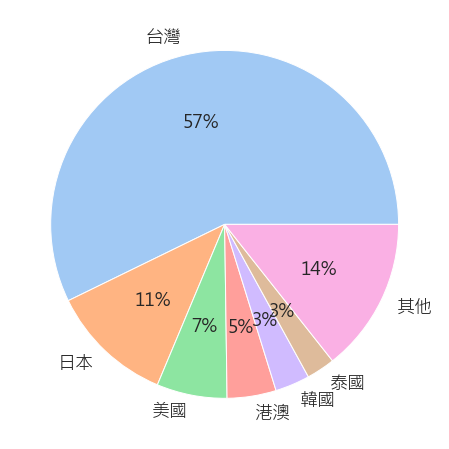

In [29]:
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')
plt.pie(temp.values, colors = colors, labels = temp.index, autopct='%0.0f%%', textprops={'fontsize': 18})
plt.show()